# Evaluated project 8

# Rain Fall Prediction

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file and convert into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [4]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [5]:
# number of rows and column
df.shape

(8425, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# Dataset has 8425 rows and 23 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
#We have float,and object data in dataset. we should do encoding for object data

In [10]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [11]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# Null value check

<AxesSubplot:>

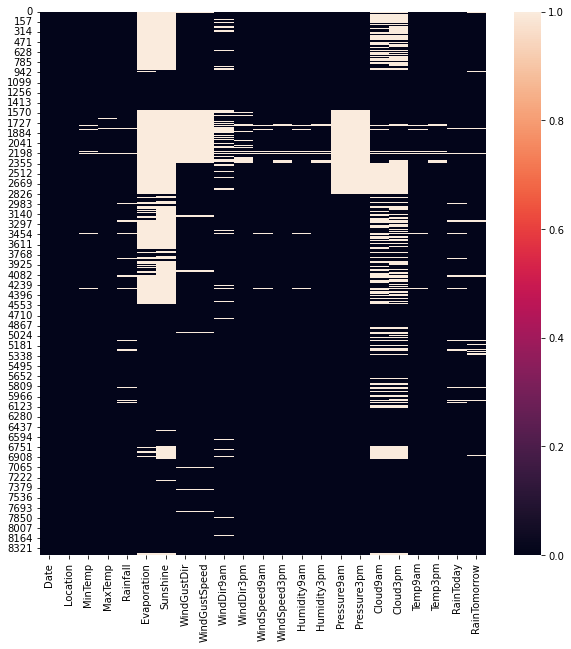

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [13]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [14]:
df.shape

(8425, 23)

In [15]:
#We have null values so we will proceed to treat them

# Null value treatment

In [16]:
# I am using Simple Imputer to treat Null values

In [17]:
from sklearn.impute import SimpleImputer
numerical=['Sunshine','Cloud3pm','Cloud9am','Pressure3pm','Pressure9am','WindGustSpeed','Rainfall','WindSpeed3pm','Humidity3pm',
           'Temp3pm','WindSpeed9am','MinTemp','MaxTemp','Humidity9am','Temp9am',
          'Evaporation']
categorical=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [18]:
sii = SimpleImputer(strategy = "mean")
siii = SimpleImputer(strategy= "most_frequent")
for num in numerical:
    df[num] = sii.fit_transform(df[num].values.reshape(-1,1))
    
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))

In [19]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
# Null values are treated using simple imputer

# Univariate analysis

<AxesSubplot:xlabel='Location', ylabel='count'>

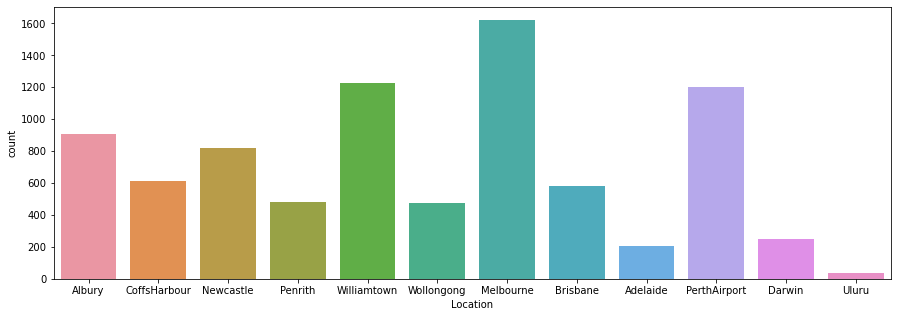

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(df['Location'])

In [22]:
# Melbourne data is higher compared to others

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

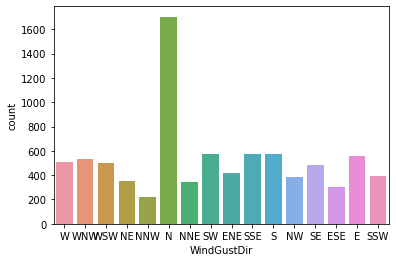

In [23]:
sns.countplot(df['WindGustDir'])

In [24]:
#WindgustDir has N (north) data higher compared to others

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

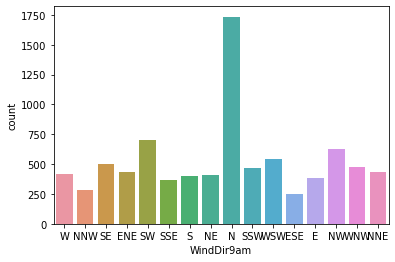

In [25]:
sns.countplot(df['WindDir9am'])

In [26]:
# WindDir9am has N (north) data higher compared to others

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

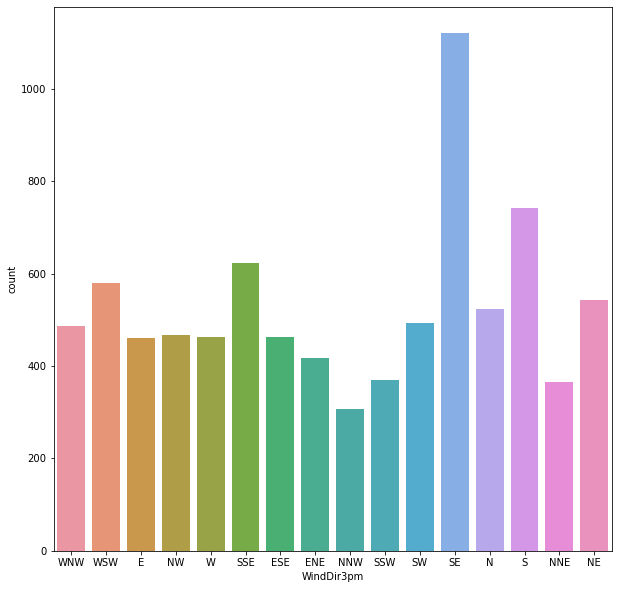

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(df['WindDir3pm'])

In [28]:
# 'WindDir3pm'has SE (southEast) data higher compared to others

<AxesSubplot:xlabel='RainToday', ylabel='count'>

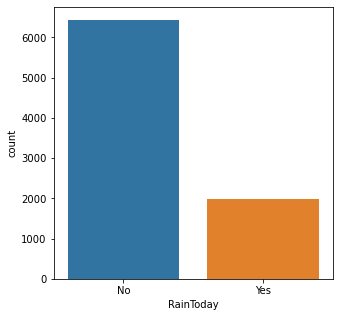

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(df['RainToday'])

In [30]:
# Rain Today has No data higher compared to yes

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

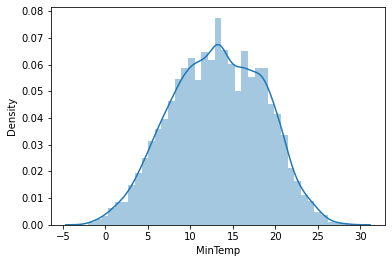

In [31]:
sns.distplot(df['MinTemp'])

In [32]:
# 'MinTemp'is normally distributed

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

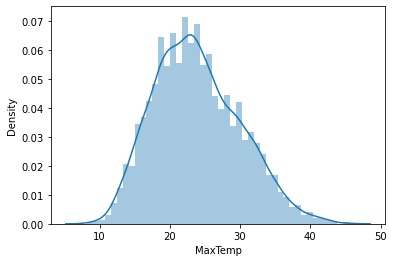

In [33]:
sns.distplot(df['MaxTemp'])

In [34]:
# 'MaxTemp' is normally distributed

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

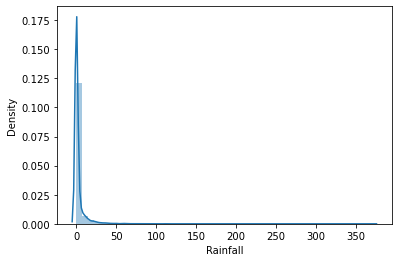

In [35]:
sns.distplot(df['Rainfall'])

In [36]:
#'Rainfall' is positively skewed

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

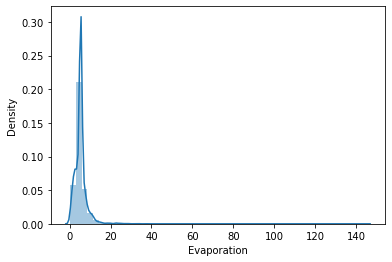

In [37]:
sns.distplot(df['Evaporation'])

In [38]:
# 'Evaporation' is also positively skewed

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

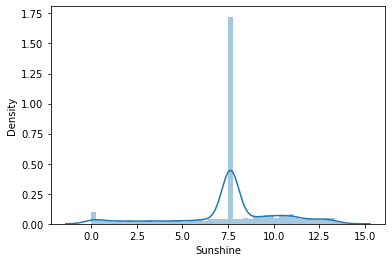

In [39]:
sns.distplot(df['Sunshine'])

In [40]:
# Sunshine is normally distributed

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

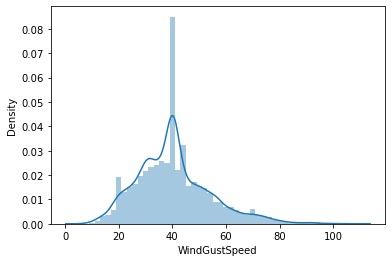

In [41]:
sns.distplot(df['WindGustSpeed'])

In [42]:
# 'WindGustSpeed' is positively skewed

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

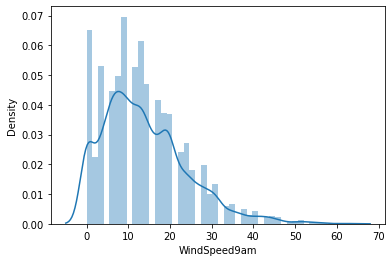

In [43]:
sns.distplot(df['WindSpeed9am'])

In [44]:
# 'WindSpeed9am' is also positively skewed

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

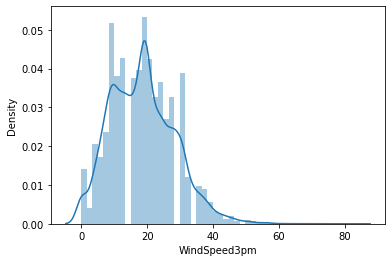

In [45]:
sns.distplot(df['WindSpeed3pm'])

In [46]:
# 'WindSpeed3pm' is also positvely skewed

# Using for loop to plot others

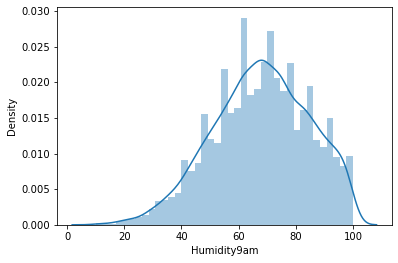

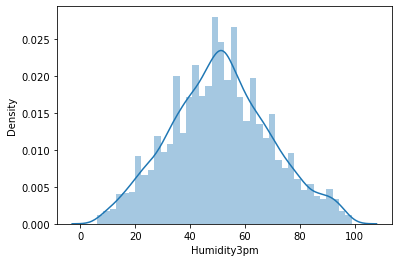

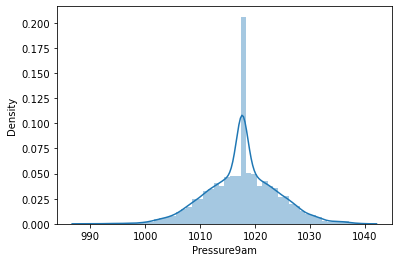

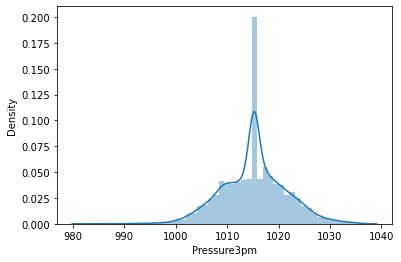

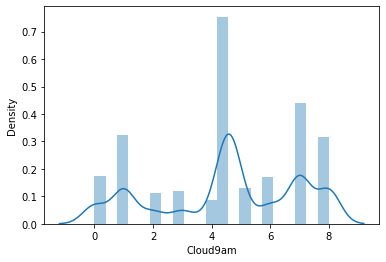

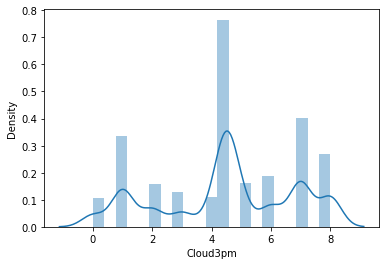

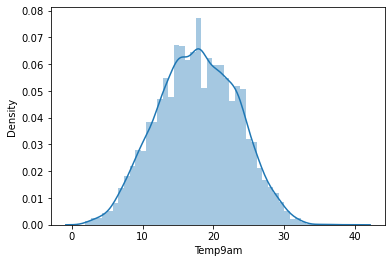

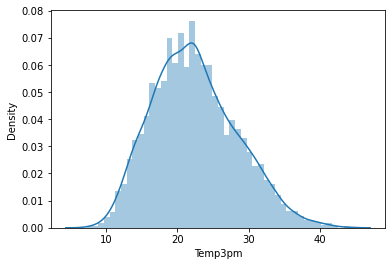

In [47]:
sk=['Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

for i in sk:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

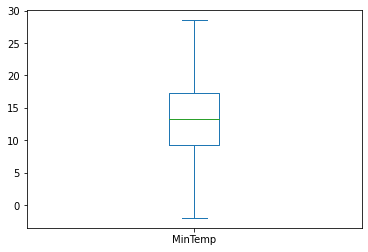

In [48]:
df['MinTemp'].plot.box()

In [49]:
# No outliers detected

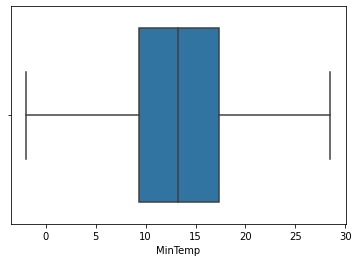

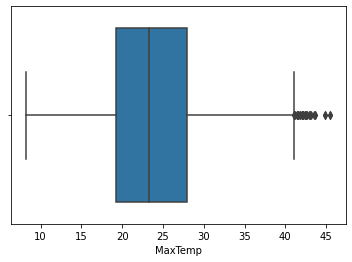

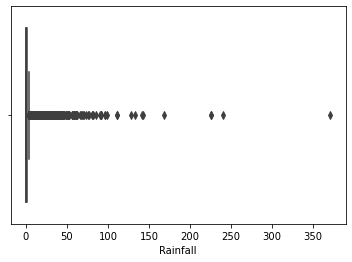

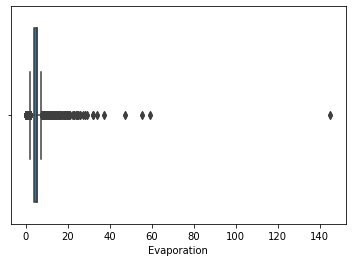

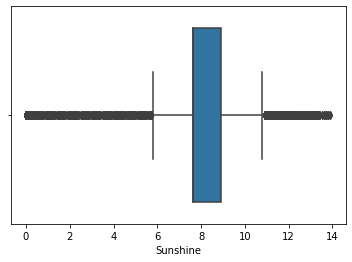

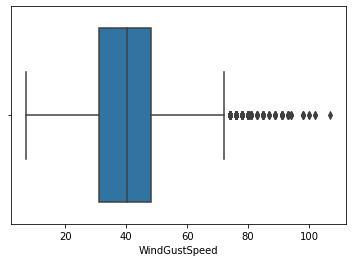

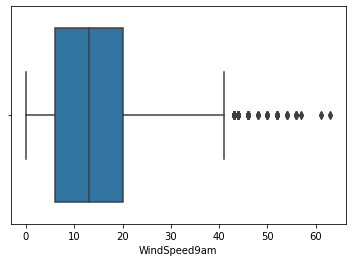

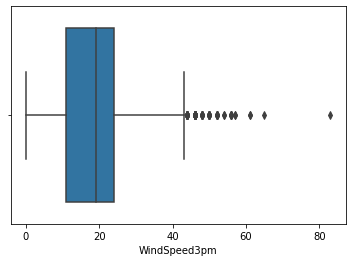

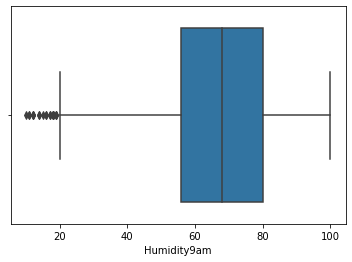

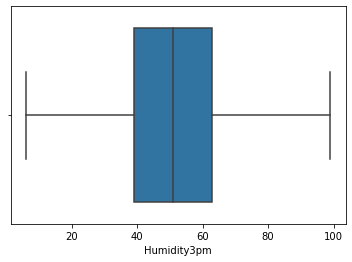

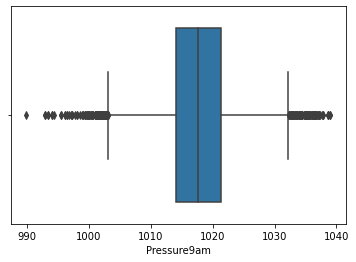

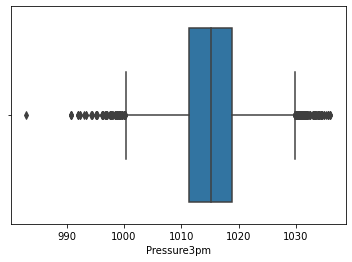

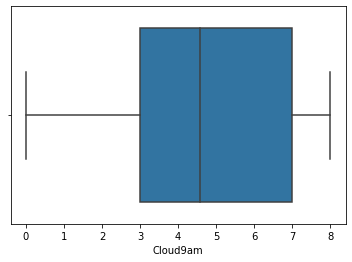

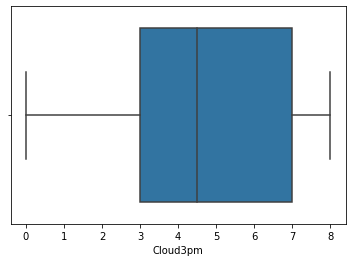

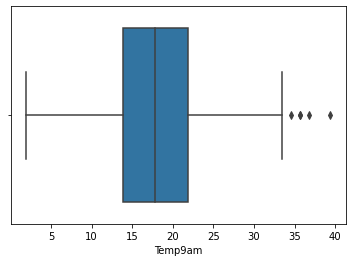

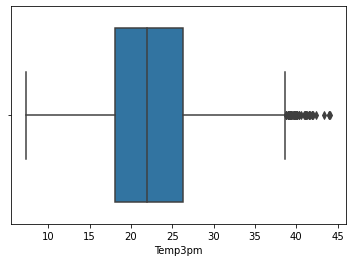

In [50]:
sk= [ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

for i in sk:
    sns.boxplot(df[i])
    plt.show()

In [51]:
# Maxtemp,Rainfall,Evaporation,shunshine,WindGustSpeed,Windspeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3Pm,cloud9am,Temp9am,temp3pm might have outliers

# Bivariate Analysis

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

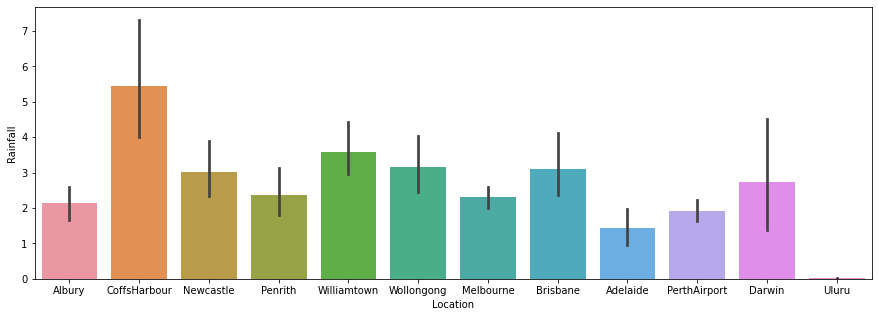

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(df['Location'],df['Rainfall'])

In [53]:
# CoffsHarbout has higher rainfall overall

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

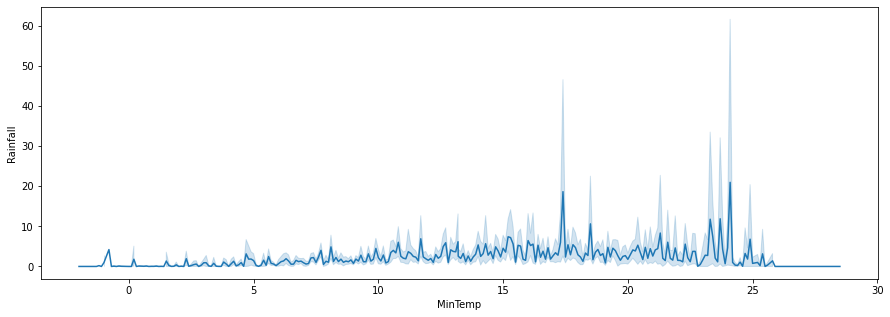

In [54]:
plt.figure(figsize=(15,5))
sns.lineplot(df['MinTemp'],df['Rainfall'])

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

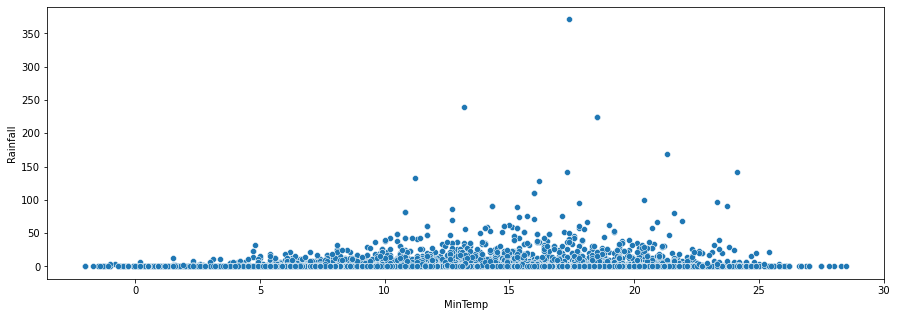

In [55]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['MinTemp'],df['Rainfall'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

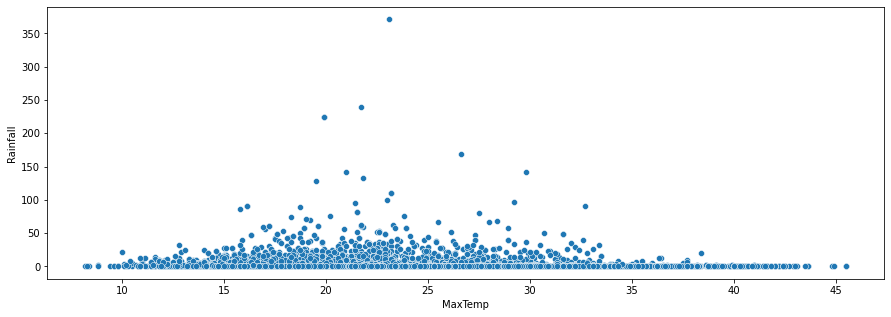

In [56]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['MaxTemp'],df['Rainfall'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

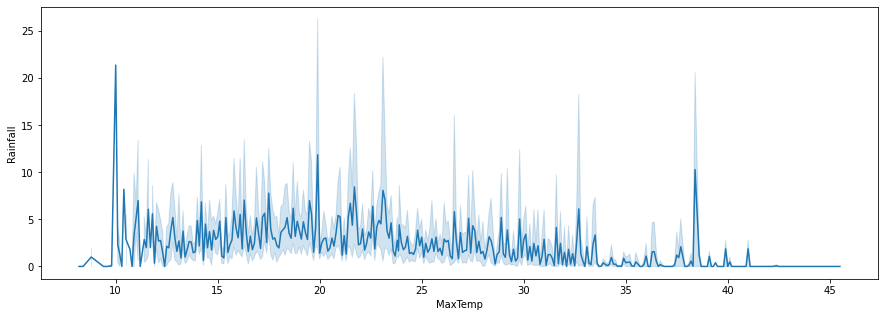

In [57]:
plt.figure(figsize=(15,5))
sns.lineplot(df['MaxTemp'],df['Rainfall'])

In [58]:
# Max Temp is negatively correlated to rainfall

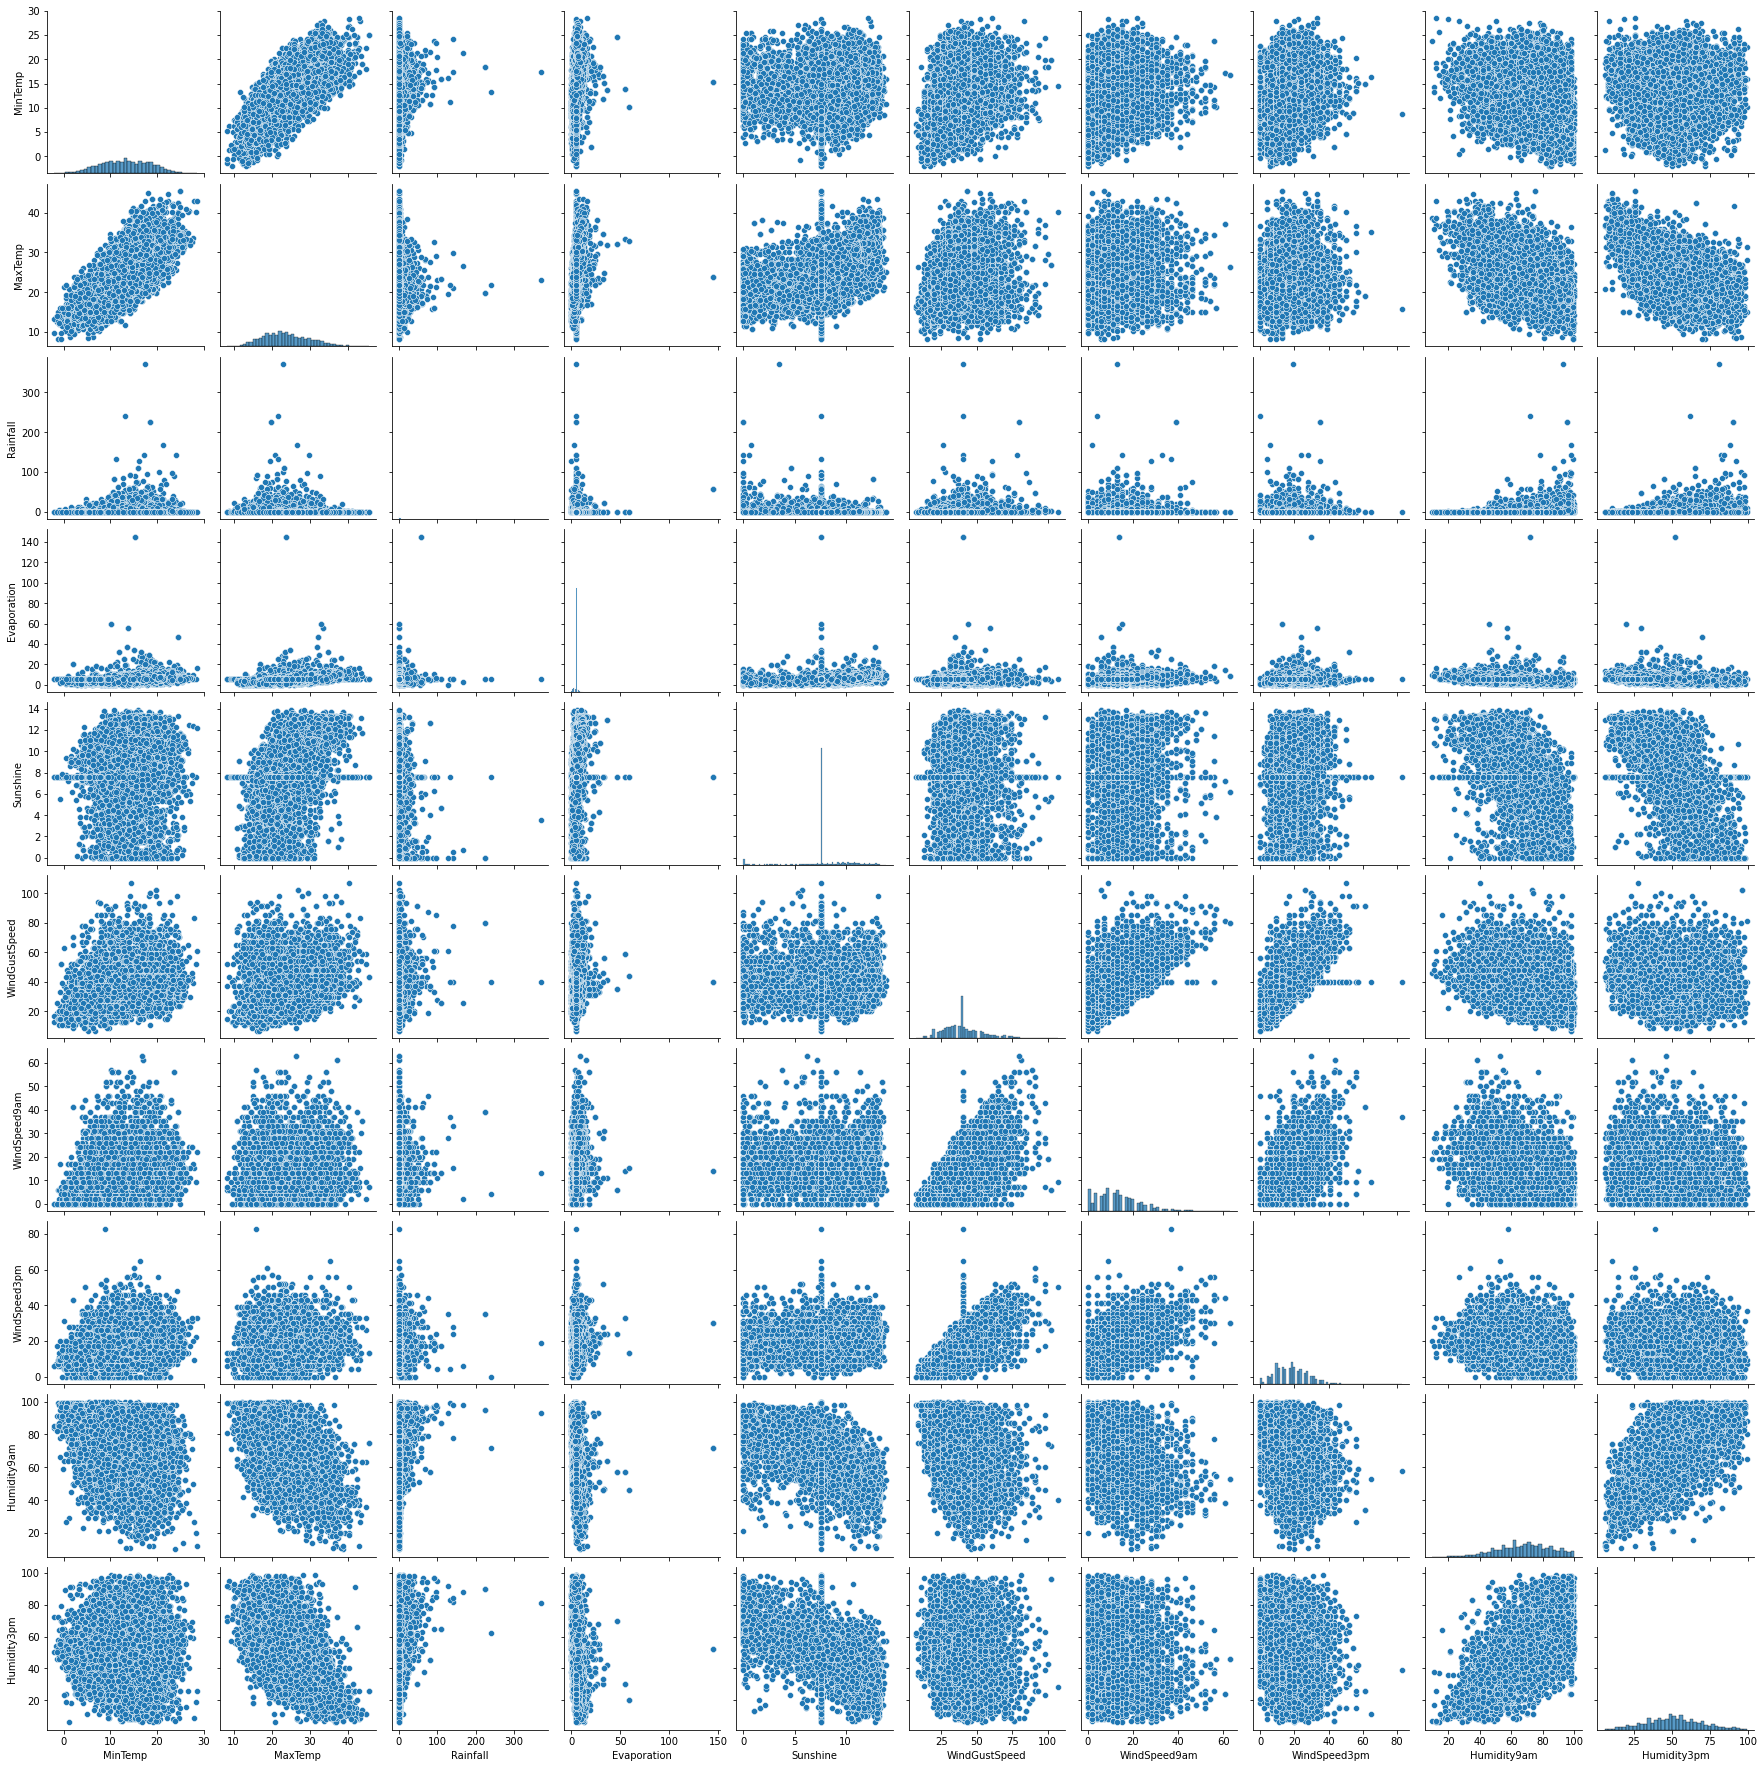

In [59]:
sns.pairplot(df.iloc[:,0:15])

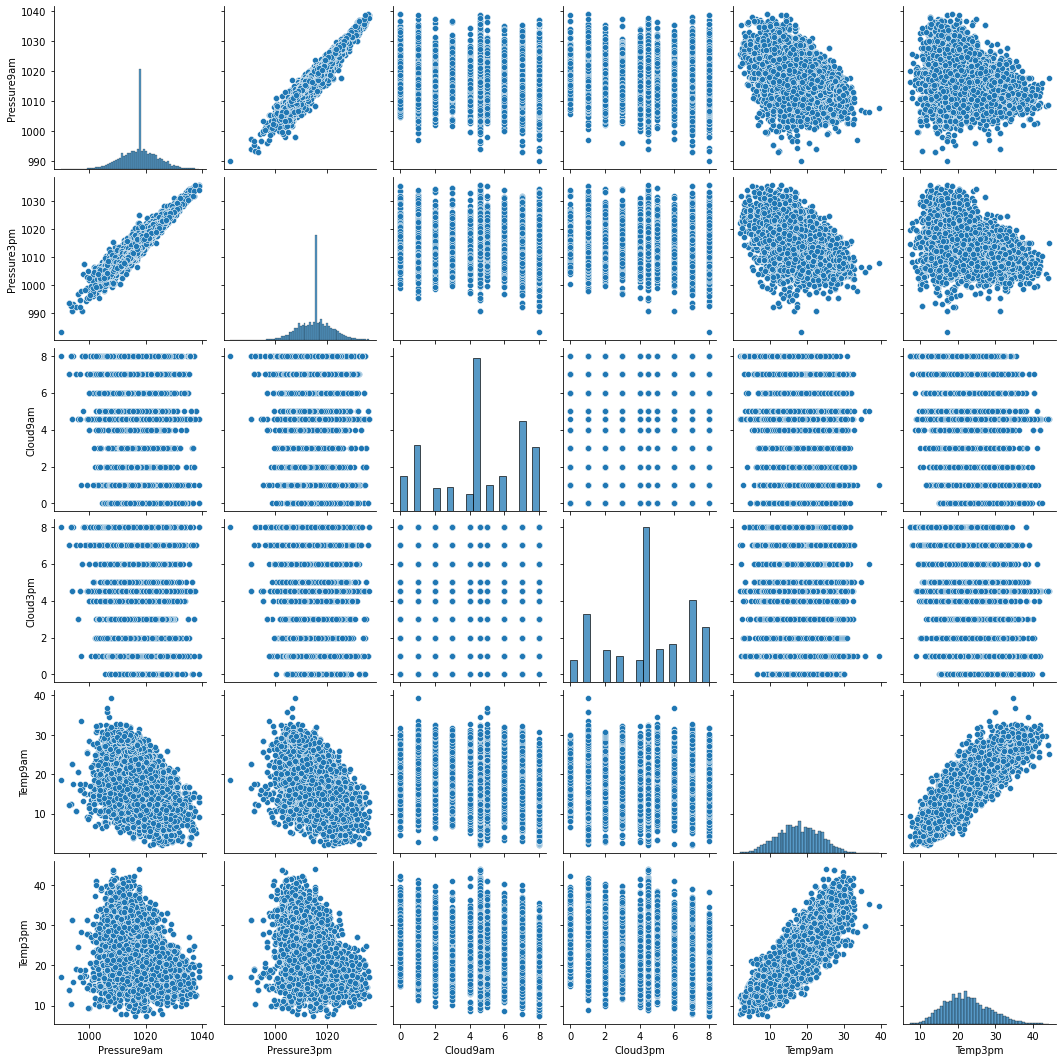

In [60]:
sns.pairplot(df.iloc[:,15:30])

In [61]:
#Pressure 3 am and pressure9am are positvely correlated

#Temp9pm, temp3pm are positvely correlated

#Pressure3pm and temp9am are negatively correalted

#Pressure9am and Temp9am are also Negatively correlated

#Mintemp and Maxtemp are positively correlated

#Humidity 9am and max temp are negatively correalted

# Encoding

In [62]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [63]:
# now i need to encode categorical data

In [64]:
a = pd.get_dummies(df["Location"],prefix='date',drop_first=True)

In [65]:
b = pd.get_dummies(df["WindGustDir"],prefix='dir',drop_first=True)

In [66]:
c = pd.get_dummies(df["WindDir9am"],prefix='9',drop_first=True)

In [67]:
d = pd.get_dummies(df["WindDir3pm"],prefix='3',drop_first=True)

In [68]:
e = pd.get_dummies(df["RainToday"],prefix='4',drop_first=True)

In [69]:
df["day"]  = pd.to_datetime(df["Date"]).dt.day

In [70]:
df["month"]  = pd.to_datetime(df["Date"]).dt.month

In [71]:
df["year"]  = pd.to_datetime(df["Date"]).dt.year

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"].values.reshape(-1,1))

In [73]:
df.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],inplace=True,axis=1)

In [74]:
# we have succesfully converted all object data to numeric data

# Correlation

<AxesSubplot:>

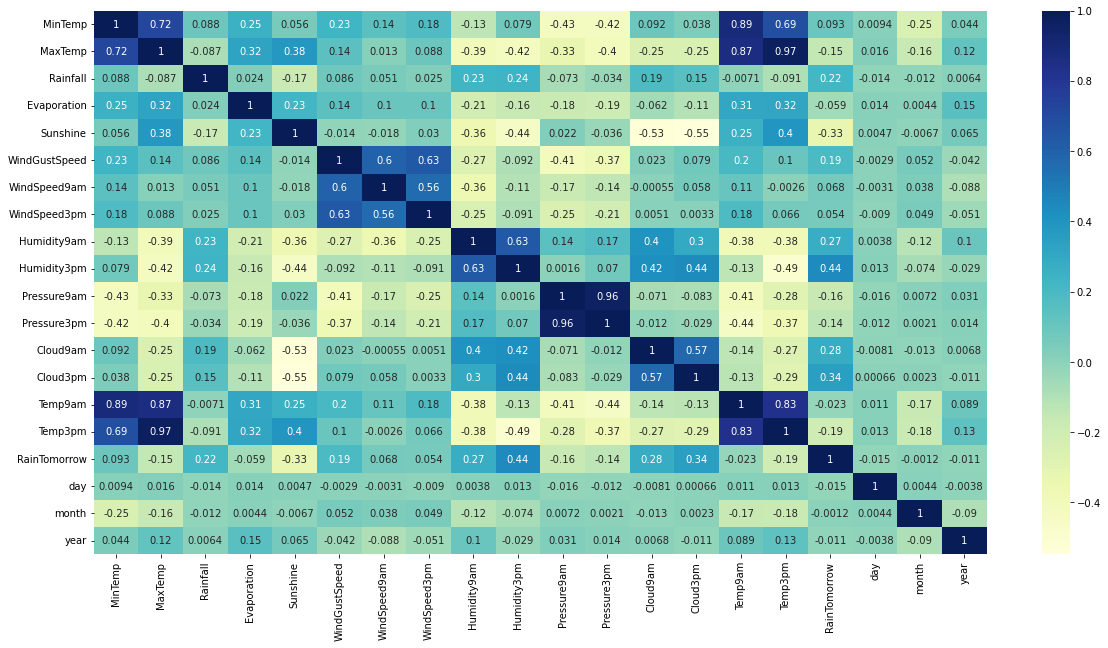

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [76]:
df.corr()["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.444808
Cloud3pm         0.344369
Cloud9am         0.278943
Humidity9am      0.271222
Rainfall         0.220021
WindGustSpeed    0.190127
MinTemp          0.092942
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
month           -0.001243
year            -0.011066
day             -0.015461
Temp9am         -0.023211
Evaporation     -0.059012
Pressure3pm     -0.135242
MaxTemp         -0.152886
Pressure9am     -0.163985
Temp3pm         -0.193805
Sunshine        -0.327731
Name: RainTomorrow, dtype: float64

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

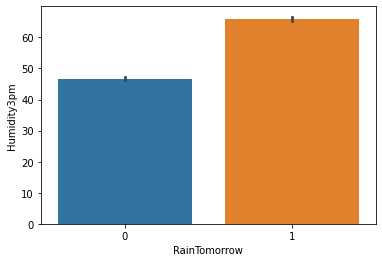

In [77]:
sns.barplot(df['RainTomorrow'],df['Humidity3pm'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

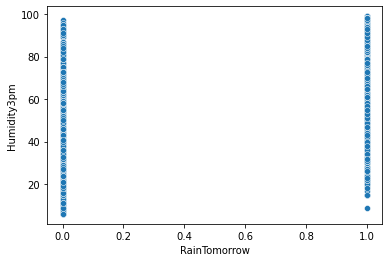

In [78]:
sns.scatterplot(df['RainTomorrow'],df['Humidity3pm'])

In [79]:
# Humidity3pm has positive correlation with raintomorrow

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

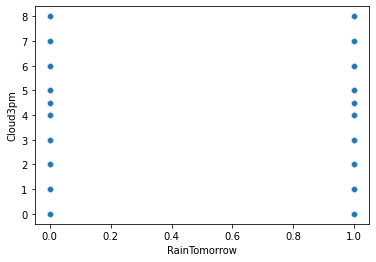

In [80]:
sns.scatterplot(df['RainTomorrow'],df['Cloud3pm'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

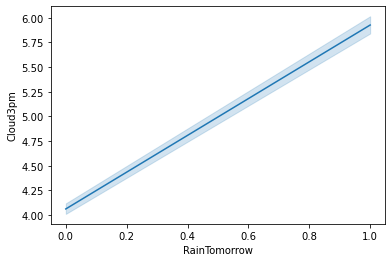

In [81]:
sns.lineplot(df['RainTomorrow'],df['Cloud3pm'])

In [82]:
# Raintomorrow and Cloud3pm has positive correlaion

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud9am'>

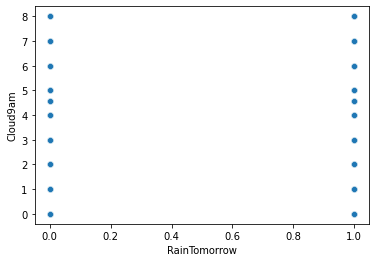

In [83]:
sns.scatterplot(df['RainTomorrow'],df['Cloud9am'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud9am'>

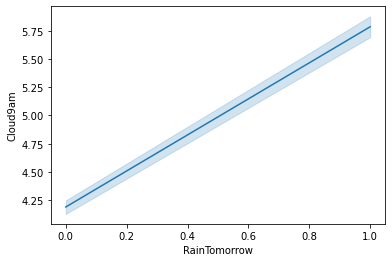

In [84]:
sns.lineplot(df['RainTomorrow'],df['Cloud9am'])

In [85]:
# Raintomorrow and Cloud9am has positive correlaion

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

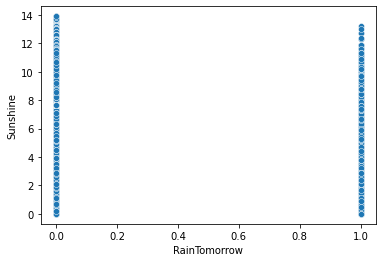

In [86]:
sns.scatterplot(df['RainTomorrow'],df['Sunshine'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

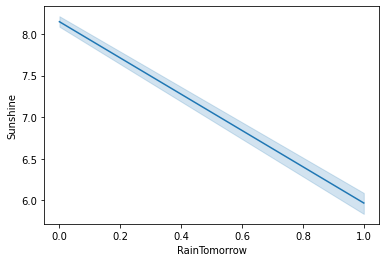

In [87]:
sns.lineplot(df['RainTomorrow'],df['Sunshine'])

In [88]:
# Raintomorrow and sunshine has negative correlaion

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

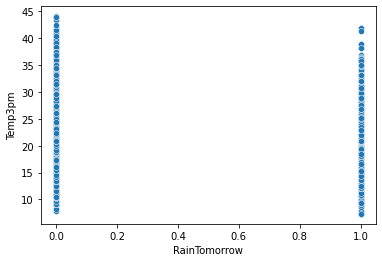

In [89]:
sns.scatterplot(df['RainTomorrow'],df['Temp3pm'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

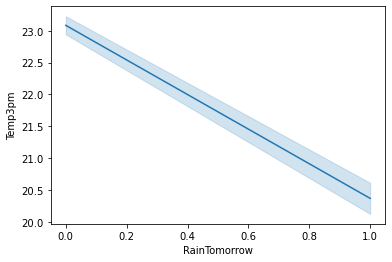

In [90]:
sns.lineplot(df['RainTomorrow'],df['Temp3pm'])

In [91]:
# Raintomorrow and Temp3pm has negative correlaion

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure9am'>

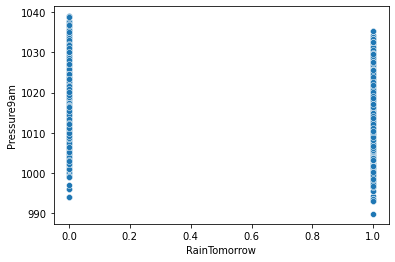

In [92]:
sns.scatterplot(df['RainTomorrow'],df['Pressure9am'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure9am'>

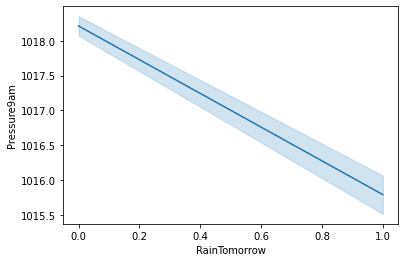

In [93]:
sns.lineplot(df['RainTomorrow'],df['Pressure9am'])

In [94]:
#Raintomorrow and 'Pressure9am' has negative correlaion

# Skewness

In [95]:
dc1 = df.drop(["day","month","year","RainTomorrow"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

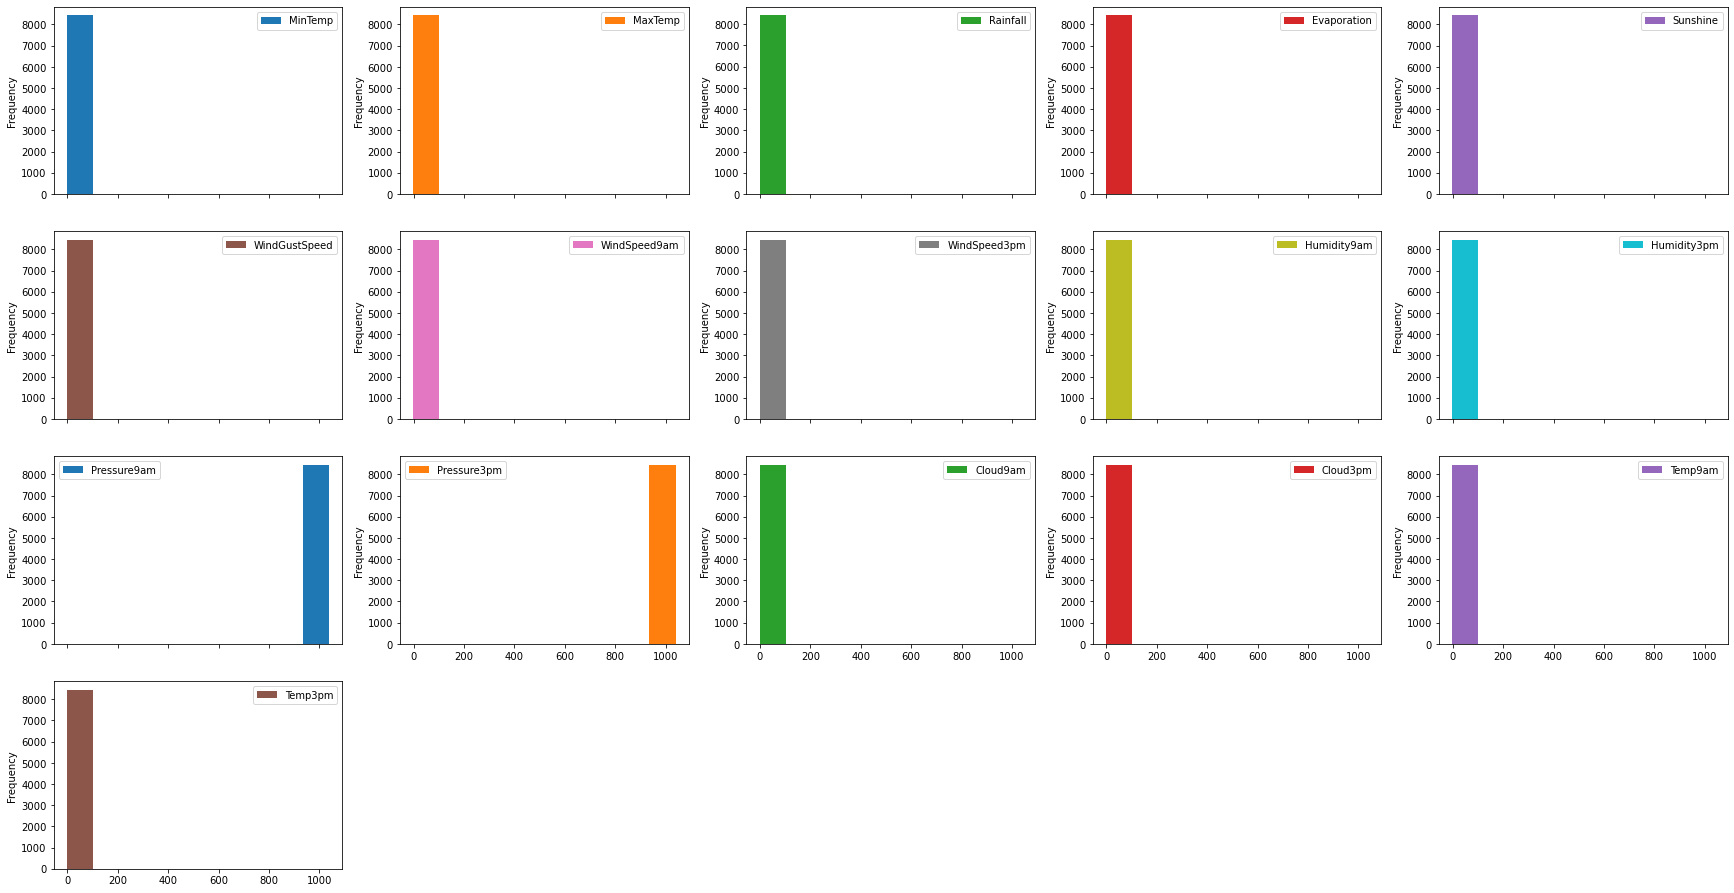

In [96]:
dc1.plot(kind="hist",subplots=True,layout=(5,5),figsize=(30,20))

In [97]:
dc1.skew().sort_values(ascending=False)

Evaporation      14.023948
Rainfall         13.218403
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
MaxTemp           0.380654
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
MinTemp          -0.089989
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

# Using power_transform for skewness removal

In [98]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [99]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

dc2.skew()

MinTemp         -0.102983
MaxTemp         -0.010591
Rainfall         0.904387
Evaporation      0.080305
Sunshine        -0.075544
WindGustSpeed    0.010481
WindSpeed9am    -0.079333
WindSpeed3pm    -0.037553
Humidity9am     -0.067235
Humidity3pm     -0.038753
Pressure9am      0.002514
Pressure3pm      0.001772
Cloud9am        -0.282006
Cloud3pm        -0.220610
Temp9am         -0.048994
Temp3pm         -0.009893
dtype: float64

In [100]:
# we have removed skewness

# Outlier removal

MinTemp             AxesSubplot(0.125,0.125;0.0407895x0.755)
MaxTemp          AxesSubplot(0.173947,0.125;0.0407895x0.755)
Rainfall         AxesSubplot(0.222895,0.125;0.0407895x0.755)
Evaporation      AxesSubplot(0.271842,0.125;0.0407895x0.755)
Sunshine         AxesSubplot(0.320789,0.125;0.0407895x0.755)
WindGustSpeed    AxesSubplot(0.369737,0.125;0.0407895x0.755)
WindSpeed9am     AxesSubplot(0.418684,0.125;0.0407895x0.755)
WindSpeed3pm     AxesSubplot(0.467632,0.125;0.0407895x0.755)
Humidity9am      AxesSubplot(0.516579,0.125;0.0407895x0.755)
Humidity3pm      AxesSubplot(0.565526,0.125;0.0407895x0.755)
Pressure9am      AxesSubplot(0.614474,0.125;0.0407895x0.755)
Pressure3pm      AxesSubplot(0.663421,0.125;0.0407895x0.755)
Cloud9am         AxesSubplot(0.712368,0.125;0.0407895x0.755)
Cloud3pm         AxesSubplot(0.761316,0.125;0.0407895x0.755)
Temp9am          AxesSubplot(0.810263,0.125;0.0407895x0.755)
Temp3pm          AxesSubplot(0.859211,0.125;0.0407895x0.755)
dtype: object

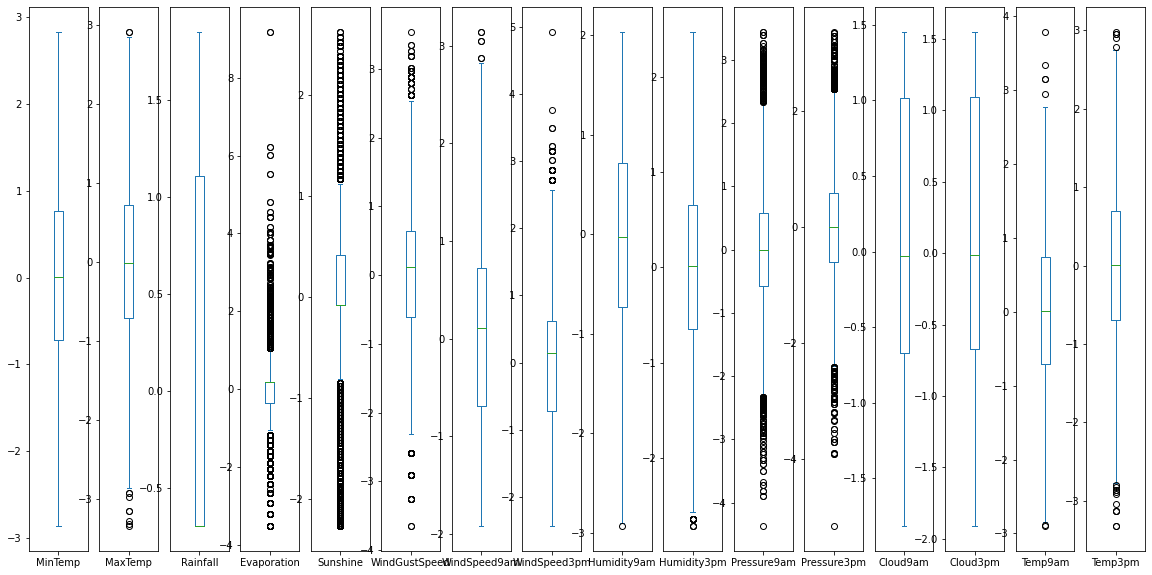

In [101]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [102]:
dc2.shape

(8425, 16)

In [103]:
from scipy.stats import zscore

z = np.abs(zscore(dc2))

np.where(z>3)

(array([  12,   12,   52,  123,  190,  190,  193,  193,  238,  238,  296,
         381,  466,  555,  555,  563,  568,  568,  569,  574,  574,  602,
         608,  683,  683,  748, 1008, 1387, 1413, 1467, 1480, 1644, 1665,
        1898, 2028, 2043, 2219, 2230, 2346, 2373, 2389, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897,
        2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
        3141, 3157, 3164, 3167, 3172, 3178, 3206, 3212, 3213, 3221, 3227,
        3248, 3260, 3278, 3303, 3449, 3449, 3450, 3687, 3701, 3707, 3715,
        3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791, 3799,
        3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912, 3919,
        3934, 3950, 3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030,
        4058, 4064, 4065, 4073, 4079, 4100, 4112, 4130, 4155, 4301, 4301,
        4302, 4528, 4528, 4566, 4568, 

In [104]:
df1 = dc2[(z<3).all(axis=1)]

In [105]:
df1.shape

(8193, 16)

In [106]:
# The outliers are removed

# Data loss

In [107]:
((8425-8193)/8425)*100

2.7537091988130564

# Creating categorical data dataframe

In [108]:
cat=["day","month","year","RainTomorrow"]
dfc = pd.DataFrame()
for i in cat:
    dfc[i] = df[i]
dfc.shape

(8425, 4)

In [109]:
dfc1 = dfc.join(a).join(b).join(c).join(d).join(e)

dfc1.shape

(8425, 61)

# Removing the outlier removed rows in categorical dataframe

In [110]:
dfc1.drop([  12,   12,   52,  123,  190,  190,  193,  193,  238,  238,  296,
         381,  466,  555,  555,  563,  568,  568,  569,  574,  574,  602,
         608,  683,  683,  748, 1008, 1387, 1413, 1467, 1480, 1644, 1665,
        1898, 2028, 2043, 2219, 2230, 2346, 2373, 2389, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897,
        2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
        3141, 3157, 3164, 3167, 3172, 3178, 3206, 3212, 3213, 3221, 3227,
        3248, 3260, 3278, 3303, 3449, 3449, 3450, 3687, 3701, 3707, 3715,
        3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791, 3799,
        3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912, 3919,
        3934, 3950, 3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030,
        4058, 4064, 4065, 4073, 4079, 4100, 4112, 4130, 4155, 4301, 4301,
        4302, 4528, 4528, 4566, 4568, 4619, 4638, 4672, 4678, 4678, 4763,
        4771, 4779, 4780, 4780, 4785, 4797, 4811, 4814, 4854, 4854, 4895,
        4895, 4960, 4960, 5086, 5091, 5108, 5122, 5122, 5123, 5138, 5143,
        5145, 5164, 5165, 5173, 5175, 5175, 5176, 5176, 5214, 5214, 5237,
        5243, 5301, 5339, 5339, 5377, 5379, 5430, 5449, 5483, 5489, 5489,
        5574, 5582, 5590, 5591, 5591, 5596, 5608, 5622, 5625, 5665, 5665,
        5706, 5706, 5771, 5771, 5897, 5902, 5919, 5933, 5933, 5934, 5949,
        5954, 5956, 5975, 5976, 5984, 5986, 5986, 5987, 5987, 6025, 6025,
        6048, 6054, 6112, 6617, 6626, 6660, 6758, 6786, 6786, 6793, 6794,
        6794, 6862, 6876, 6904, 6918, 6925, 6960, 6978, 6993, 7128, 7132,
        7142, 7186, 7187, 7187, 7188, 7462, 7463, 7468, 7494, 7633, 7633,
        7735, 7735, 7984, 8114, 8119],axis=0,inplace=True)

dfc1.shape

(8193, 61)

# Balancing the data

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

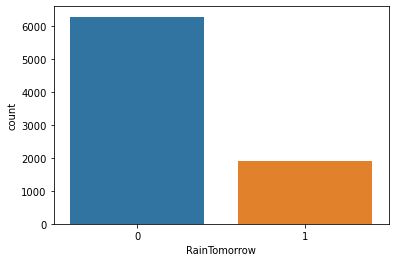

In [111]:
sns.countplot(dfc1.iloc[:,3])

In [112]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [113]:
dfb = df1.join(dfc1)
dx = dfb.drop("RainTomorrow",axis=1)
dy = dfc1.iloc[:,3]

In [114]:
dft,y = sm.fit_resample(dx,dy)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

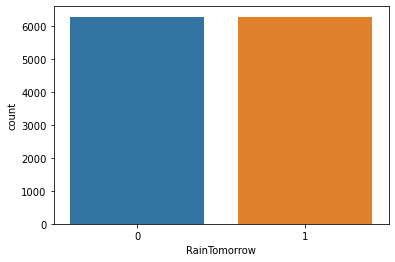

In [115]:
sns.countplot(y)

# Multicolinearity Checking

In [116]:
# variance inflation factor

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(76)]
vif["feature names"] = dft.columns

vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
15  34.823295            Temp3pm
1   27.184210            MaxTemp
14  23.800408            Temp9am
10  20.509624        Pressure9am
11  19.665482        Pressure3pm
18  18.222425               year
0   11.650322            MinTemp
9    7.237480        Humidity3pm
17   5.492408              month
75   5.222225              4_Yes
8    5.046614        Humidity9am
2    4.601389           Rainfall
32   4.518853              dir_N
24   4.339846     date_Newcastle
16   4.169657                day
23   3.691598     date_Melbourne
28   3.074871   date_Williamtown
47   2.907791                9_N
6    2.792838       WindSpeed9am
5    2.693935      WindGustSpeed
26   2.642691  date_PerthAirport
68   2.398597               3_SE
7    2.332629       WindSpeed3pm
19   2.317590        date_Albury
12   2.217580           Cloud9am
4    2.183569           Sunshine
13   2.092063           Cloud3pm
21   2.013199  date_CoffsHarbour
67   1.959931                3_S
20   1.956073      date_Brisbane
29   1.851684    date_Wollongong
37   1.840362              dir_S
62   1.794306                3_N
3    1.784378        Evaporation
56   1.768594               9_SW
74   1.720560              3_WSW
41   1.719860             dir_SW
69   1.713616              3_SSE
42   1.712940              dir_W
39   1.700958            dir_SSE
25   1.698326       date_Penrith
43   1.687391            dir_WNW
51   1.683781               9_NW
73   1.649347              3_WNW
72   1.644817                3_W
63   1.634651               3_NE
44   1.628075            dir_WSW
71   1.587723               3_SW
58   1.579129              9_WNW
59   1.555573              9_WSW
66   1.535943               3_NW
38   1.514146             dir_SE
55   1.512724              9_SSW
36   1.505248             dir_NW
22   1.491750        date_Darwin
53   1.490054               9_SE
40   1.489137            dir_SSW
34   1.487949            dir_NNE
57   1.482804                9_W
64   1.482280              3_NNE
70   1.450673              3_SSW
33   1.435153             dir_NE
30   1.426629            dir_ENE
45   1.413840              9_ENE
60   1.413699              3_ENE
49   1.403710              9_NNE
61   1.402874              3_ESE
52   1.393264                9_S
65   1.388565              3_NNW
48   1.376797               9_NE
54   1.341462              9_SSE
31   1.301143            dir_ESE
35   1.280691            dir_NNW
50   1.267314              9_NNW
46   1.249414              9_ESE
27   1.112552         date_Uluru

In [119]:
# Temp3pm has high vif index so dropping it

In [120]:
dft.drop("Temp3pm",axis=1,inplace=True)

In [121]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(75)]
vif["feature names"] = dft.columns

vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
14  22.072221            Temp9am
10  19.832067        Pressure9am
11  19.130638        Pressure3pm
17  18.189355               year
0   11.588384            MinTemp
1   11.370179            MaxTemp
16   5.433375              month
74   5.220990              4_Yes
2    4.601344           Rainfall
9    4.520903        Humidity3pm
31   4.516601              dir_N
8    4.378286        Humidity9am
23   4.323899     date_Newcastle
15   4.169627                day
22   3.690410     date_Melbourne
27   3.070968   date_Williamtown
46   2.907643                9_N
6    2.789968       WindSpeed9am
5    2.657346      WindGustSpeed
25   2.642679  date_PerthAirport
67   2.397569               3_SE
7    2.332524       WindSpeed3pm
18   2.316568        date_Albury
12   2.215950           Cloud9am
4    2.183425           Sunshine
13   2.081070           Cloud3pm
20   2.011736  date_CoffsHarbour
66   1.959786                3_S
19   1.953370      date_Brisbane
28   1.845771    date_Wollongong
36   1.840240              dir_S
61   1.792836                3_N
3    1.783623        Evaporation
55   1.768593               9_SW
73   1.720211              3_WSW
40   1.719735             dir_SW
68   1.713549              3_SSE
41   1.712897              dir_W
38   1.700921            dir_SSE
24   1.697695       date_Penrith
42   1.685415            dir_WNW
50   1.683753               9_NW
72   1.649056              3_WNW
71   1.643499                3_W
62   1.632244               3_NE
43   1.628071            dir_WSW
70   1.587260               3_SW
57   1.578734              9_WNW
58   1.555483              9_WSW
65   1.535197               3_NW
37   1.514053             dir_SE
54   1.512574              9_SSW
35   1.505008             dir_NW
21   1.491748        date_Darwin
52   1.490016               9_SE
39   1.489136            dir_SSW
33   1.487773            dir_NNE
56   1.482802                9_W
63   1.481526              3_NNE
69   1.450656              3_SSW
32   1.435150             dir_NE
29   1.426574            dir_ENE
44   1.413770              9_ENE
59   1.412598              3_ENE
48   1.403169              9_NNE
60   1.402838              3_ESE
51   1.393264                9_S
64   1.388564              3_NNW
47   1.376788               9_NE
53   1.341326              9_SSE
30   1.300973            dir_ESE
34   1.279521            dir_NNW
49   1.267020              9_NNW
45   1.249260              9_ESE
26   1.112146         date_Uluru

In [122]:
# Temp9am has high vif index so dropping it

In [123]:
dft.drop("Temp9am",axis=1,inplace=True)

In [124]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(74)]
vif["feature names"] = dft.columns


vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
10  19.662317        Pressure9am
11  19.036858        Pressure3pm
16  18.168082               year
1    6.632944            MaxTemp
0    6.120163            MinTemp
15   5.422740              month
73   5.220678              4_Yes
2    4.600034           Rainfall
30   4.511621              dir_N
22   4.323190     date_Newcastle
14   4.169599                day
9    3.848036        Humidity3pm
21   3.579910     date_Melbourne
8    3.134287        Humidity9am
26   3.016465   date_Williamtown
45   2.907608                9_N
6    2.772243       WindSpeed9am
5    2.638816      WindGustSpeed
24   2.623241  date_PerthAirport
66   2.396610               3_SE
17   2.308773        date_Albury
7    2.301236       WindSpeed3pm
12   2.209316           Cloud9am
4    2.179598           Sunshine
13   2.081070           Cloud3pm
65   1.959294                3_S
19   1.958540  date_CoffsHarbour
18   1.921224      date_Brisbane
27   1.845685    date_Wollongong
35   1.839473              dir_S
60   1.792773                3_N
3    1.783600        Evaporation
54   1.767175               9_SW
72   1.720211              3_WSW
39   1.719002             dir_SW
40   1.712752              dir_W
67   1.712732              3_SSE
37   1.699269            dir_SSE
23   1.691115       date_Penrith
41   1.685384            dir_WNW
49   1.683732               9_NW
71   1.648993              3_WNW
70   1.643476                3_W
61   1.632240               3_NE
42   1.627529            dir_WSW
69   1.587227               3_SW
56   1.577858              9_WNW
57   1.552560              9_WSW
64   1.533858               3_NW
36   1.514001             dir_SE
53   1.512573              9_SSW
34   1.505004             dir_NW
51   1.490016               9_SE
38   1.488840            dir_SSW
32   1.487244            dir_NNE
20   1.486979        date_Darwin
62   1.481457              3_NNE
55   1.481279                9_W
68   1.450325              3_SSW
31   1.435149             dir_NE
28   1.426563            dir_ENE
43   1.413615              9_ENE
58   1.412199              3_ENE
47   1.402338              9_NNE
59   1.402093              3_ESE
50   1.392638                9_S
63   1.388539              3_NNW
46   1.374679               9_NE
52   1.341295              9_SSE
29   1.300641            dir_ESE
33   1.279480            dir_NNW
48   1.264511              9_NNW
44   1.248734              9_ESE
25   1.103551         date_Uluru

In [125]:
# Pressure9am has higher vif index so dropping it

In [126]:
dft.drop("Pressure9am",axis=1,inplace=True)

In [127]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(73)]
vif["feature names"] = dft.columns


vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
15  18.144025               year
1    6.436373            MaxTemp
0    5.897711            MinTemp
14   5.421219              month
72   5.220007              4_Yes
2    4.571271           Rainfall
29   4.490986              dir_N
21   4.301984     date_Newcastle
13   4.166082                day
9    3.841446        Humidity3pm
20   3.574085     date_Melbourne
8    3.129057        Humidity9am
25   3.009160   date_Williamtown
44   2.905806                9_N
6    2.771903       WindSpeed9am
5    2.625098      WindGustSpeed
23   2.623233  date_PerthAirport
65   2.395567               3_SE
16   2.308533        date_Albury
7    2.279148       WindSpeed3pm
11   2.208926           Cloud9am
4    2.178016           Sunshine
12   2.080561           Cloud3pm
18   1.955102  date_CoffsHarbour
64   1.950907                3_S
17   1.914383      date_Brisbane
26   1.845040    date_Wollongong
34   1.837649              dir_S
3    1.779822        Evaporation
59   1.769043                3_N
53   1.767075               9_SW
38   1.713724             dir_SW
39   1.711831              dir_W
71   1.709366              3_WSW
66   1.705156              3_SSE
36   1.698481            dir_SSE
40   1.685384            dir_WNW
22   1.684218       date_Penrith
48   1.683640               9_NW
70   1.647575              3_WNW
69   1.634329                3_W
60   1.628864               3_NE
41   1.624044            dir_WSW
68   1.582038               3_SW
55   1.576018              9_WNW
10   1.557404        Pressure3pm
56   1.550027              9_WSW
63   1.533300               3_NW
35   1.512898             dir_SE
52   1.512441              9_SSW
33   1.504971             dir_NW
50   1.489592               9_SE
37   1.488480            dir_SSW
31   1.484649            dir_NNE
61   1.475913              3_NNE
19   1.475454        date_Darwin
54   1.473072                9_W
67   1.445772              3_SSW
30   1.434244             dir_NE
27   1.426375            dir_ENE
57   1.411117              3_ENE
42   1.410353              9_ENE
46   1.402287              9_NNE
58   1.402076              3_ESE
49   1.391292                9_S
62   1.384333              3_NNW
45   1.374664               9_NE
51   1.341294              9_SSE
28   1.300633            dir_ESE
32   1.278936            dir_NNW
47   1.264366              9_NNW
43   1.247839              9_ESE
24   1.103513         date_Uluru

In [128]:
# Year has higher vif index so dropping it

In [129]:
dft.drop("year",axis=1,inplace=True)

vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(72)]
vif["feature names"] = dft.columns

vif.sort_values(by=["vif value"],ascending=False)

vif value      feature names
1    6.428499            MaxTemp
0    5.769379            MinTemp
71   5.093508              4_Yes
2    4.504637           Rainfall
28   4.484834              dir_N
20   4.091707     date_Newcastle
14   3.915388              month
9    3.830399        Humidity3pm
13   3.469597                day
8    3.121978        Humidity9am
19   3.048102     date_Melbourne
43   2.882490                9_N
6    2.770461       WindSpeed9am
5    2.621208      WindGustSpeed
24   2.518877   date_Williamtown
64   2.394633               3_SE
7    2.274213       WindSpeed3pm
11   2.204538           Cloud9am
4    2.176085           Sunshine
22   2.153563  date_PerthAirport
12   2.079344           Cloud3pm
63   1.949744                3_S
15   1.937158        date_Albury
33   1.836347              dir_S
17   1.774036  date_CoffsHarbour
3    1.773711        Evaporation
58   1.769001                3_N
52   1.756447               9_SW
16   1.737254      date_Brisbane
37   1.713718             dir_SW
38   1.711815              dir_W
70   1.706850              3_WSW
65   1.704329              3_SSE
35   1.698152            dir_SSE
39   1.685272            dir_WNW
47   1.671673               9_NW
25   1.649790    date_Wollongong
69   1.646455              3_WNW
68   1.632213                3_W
59   1.628756               3_NE
40   1.623841            dir_WSW
67   1.579595               3_SW
54   1.572479              9_WNW
10   1.556812        Pressure3pm
55   1.545208              9_WSW
62   1.532520               3_NW
34   1.511822             dir_SE
51   1.510264              9_SSW
21   1.507840       date_Penrith
32   1.504892             dir_NW
36   1.488462            dir_SSW
49   1.485356               9_SE
30   1.484541            dir_NNE
60   1.475714              3_NNE
53   1.468598                9_W
66   1.445467              3_SSW
29   1.434128             dir_NE
26   1.426334            dir_ENE
18   1.417793        date_Darwin
56   1.410240              3_ENE
41   1.402628              9_ENE
57   1.401895              3_ESE
45   1.398007              9_NNE
48   1.389181                9_S
61   1.384321              3_NNW
44   1.372149               9_NE
50   1.336854              9_SSE
27   1.299788            dir_ESE
31   1.278855            dir_NNW
46   1.262255              9_NNW
42   1.244383              9_ESE
23   1.082116         date_Uluru

In [130]:
# Multicolinearity Removed

# Standard Scaler

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
dfc2 = dft.drop(["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm",
                 "Humidity9am","Humidity3pm","Pressure3pm","Cloud9am","Cloud3pm"],axis=1)

In [133]:
cat1 = ["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm",
                 "Humidity9am","Humidity3pm","Pressure3pm","Cloud9am","Cloud3pm"]

dft1 = pd.DataFrame()
for i in cat1:
    dft1[i] = dft[i]

In [134]:
sc = StandardScaler()
x = sc.fit_transform(dft1)
x_f= pd.DataFrame(x,columns=dft1.columns)

x_final= x_f.join(dfc2)

x_final.shape

(12554, 72)

In [135]:
# we have scaled the input data

# Model Training

In [136]:
#Importing required libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# cross val score and accuracy score

In [137]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
lr=[]
fl = [dtc,knc,rfc,abc,lr]

oo=0


for i in algo:
    acc=0
    rand=0
    
    for ii in range(20,80):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)

 the best random state is 79 and accuracy score is 0.8896853843090402 for algorithm DecisionTreeClassifier()
 the best random state is 72 and accuracy score is 0.8327359617682198 for algorithm KNeighborsClassifier()
 the best random state is 51 and accuracy score is 0.946236559139785 for algorithm RandomForestClassifier()
 the best random state is 77 and accuracy score is 0.8466746316208682 for algorithm AdaBoostClassifier()
 the best random state is 22 and accuracy score is 0.8701712465153325 for algorithm LogisticRegression()


In [138]:
final_result

Algorithm Name  Accuracy Score  \
2  (DecisionTreeClassifier(max_features='sqrt', r...        0.946635   
0                           DecisionTreeClassifier()        0.889287   
4                               LogisticRegression()        0.870171   
3  (DecisionTreeClassifier(max_depth=1, random_st...        0.846675   
1                             KNeighborsClassifier()        0.832736   

   Cross Validation Score  
2                0.720237  
0                0.704385  
4                0.609202  
3                0.562209  
1                0.722083

# Support vector classifier

In [139]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.8407009159697332, the cross validation score is 0.747656066296344 for SVC


In [140]:
# from all the classifier models random forest performed best with accuracy of 93 % and cross val score of 72 %

# HyperParameter Tunining

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
rf = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'n_estimators': [50,100,200,300]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=51)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 200, 300]})

In [143]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [144]:
rf = RandomForestClassifier(bootstrap=False,max_depth=None,max_features='auto',min_samples_leaf=1,n_estimators=100)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=51)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.9506172839506173, the cross validation score is 0.7183247257882053 


In [145]:
# The accuracy score is 94% and cross val score is 71%

In [146]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1240
           1       0.95      0.95      0.95      1271

    accuracy                           0.95      2511
   macro avg       0.95      0.95      0.95      2511
weighted avg       0.95      0.95      0.95      2511



In [147]:
print(confusion_matrix(test_y,pred))

[[1176   64]
 [  60 1211]]


# ROC CURVE

In [149]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

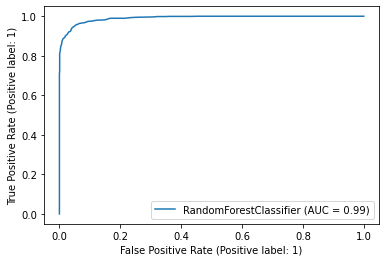

In [150]:
plot_roc_curve(rf,test_x,test_y)

In [151]:
print(f'The ROC_AUC_SCORE IS {roc_auc_score(test_y,pred)}')

The ROC_AUC_SCORE IS 0.9505900865460267


# Saving the model

In [152]:
import joblib
joblib.dump(rf,"Raninfall y or n.pkl")

['Raninfall y or n.pkl']

# Predicting How Much Rainfall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file and convert into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [4]:
df.shape

(8425, 23)

# Null value check

<AxesSubplot:>

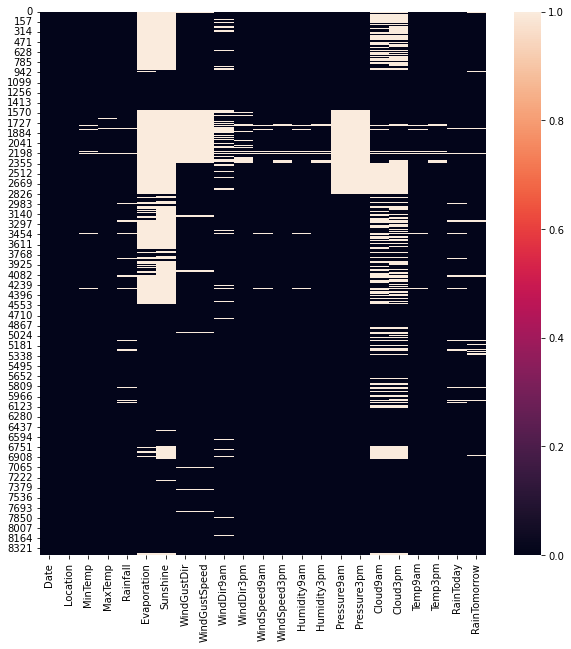

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
df.shape

(8425, 23)

# Null value treatment

In [8]:
from sklearn.impute import SimpleImputer
numerical=['Sunshine','Cloud3pm','Cloud9am','Pressure3pm','Pressure9am','WindGustSpeed','Rainfall','WindSpeed3pm','Humidity3pm',
           'Temp3pm','WindSpeed9am','MinTemp','MaxTemp','Humidity9am','Temp9am',
          'Evaporation']
categorical=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [9]:
sii = SimpleImputer(strategy = "mean")
siii = SimpleImputer(strategy= "most_frequent")
for num in numerical:
    df[num] = sii.fit_transform(df[num].values.reshape(-1,1))
    
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))

In [10]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [11]:
# null values are treated using simple imputer

# Encoding

In [12]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [13]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [14]:
a = pd.get_dummies(df["Location"],prefix='date',drop_first=True)

b = pd.get_dummies(df["WindGustDir"],prefix='dir',drop_first=True)

c = pd.get_dummies(df["WindDir9am"],prefix='9',drop_first=True)

d = pd.get_dummies(df["WindDir3pm"],prefix='3',drop_first=True)

e = pd.get_dummies(df["RainToday"],prefix='4',drop_first=True)

df["day"]  = pd.to_datetime(df["Date"]).dt.day

df["month"]  = pd.to_datetime(df["Date"]).dt.month

df["year"]  = pd.to_datetime(df["Date"]).dt.year

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["RainTomorrow"] = oe.fit_transform(df["RainTomorrow"].values.reshape(-1,1))

df.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],inplace=True,axis=1)

In [15]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow     float64
day                int64
month              int64
year               int64
dtype: object

In [16]:
# we have successfully converted object data to numeric data

# Skewness Check

In [17]:
dc1 = df.drop(["day","month","year","RainTomorrow","Rainfall"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

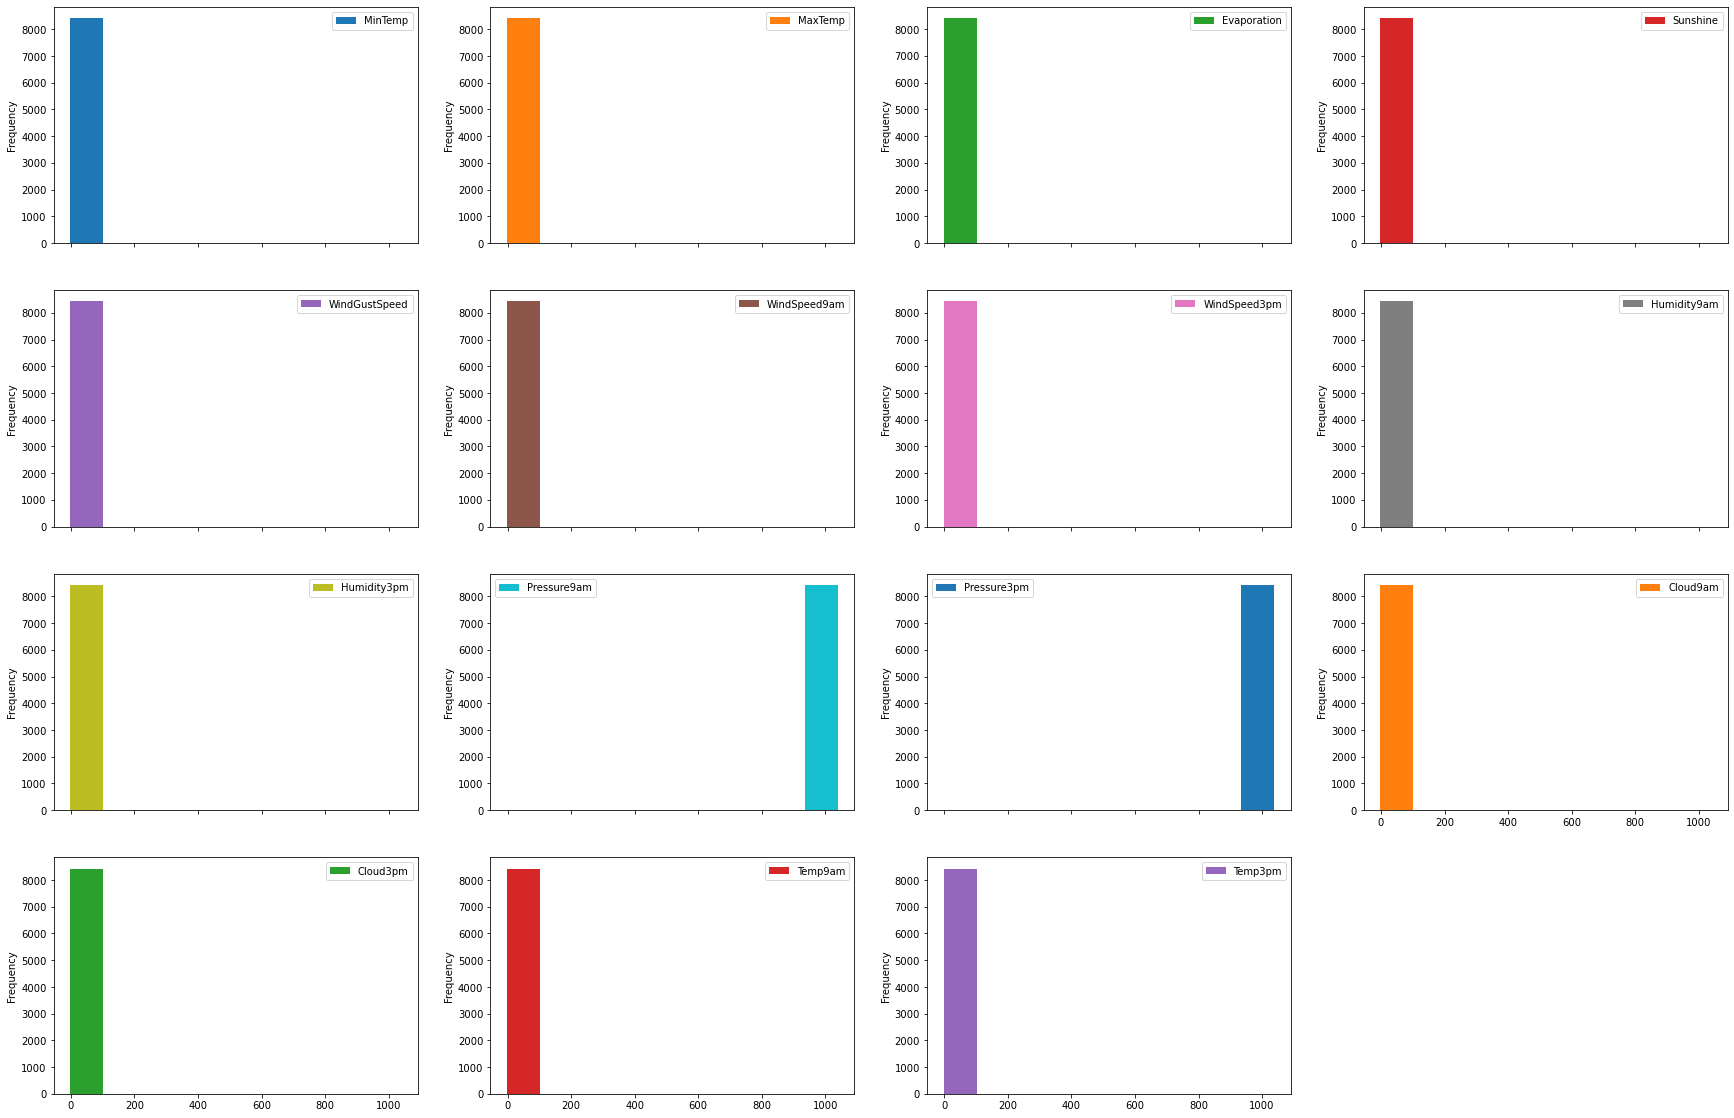

In [18]:
dc1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [19]:
dc1.skew().sort_values(ascending=False)

Evaporation      14.023948
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
MaxTemp           0.380654
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
MinTemp          -0.089989
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

# Remove skewness

In [20]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [21]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)
dc2.skew()

MinTemp         -0.102983
MaxTemp         -0.010591
Evaporation      0.080305
Sunshine        -0.075544
WindGustSpeed    0.010481
WindSpeed9am    -0.079333
WindSpeed3pm    -0.037553
Humidity9am     -0.067235
Humidity3pm     -0.038753
Pressure9am      0.002514
Pressure3pm      0.001772
Cloud9am        -0.282006
Cloud3pm        -0.220610
Temp9am         -0.048994
Temp3pm         -0.009893
dtype: float64

In [22]:
# skewness removed from data

# Outlier check

MinTemp             AxesSubplot(0.125,0.125;0.0435393x0.755)
MaxTemp          AxesSubplot(0.177247,0.125;0.0435393x0.755)
Evaporation      AxesSubplot(0.229494,0.125;0.0435393x0.755)
Sunshine         AxesSubplot(0.281742,0.125;0.0435393x0.755)
WindGustSpeed    AxesSubplot(0.333989,0.125;0.0435393x0.755)
WindSpeed9am     AxesSubplot(0.386236,0.125;0.0435393x0.755)
WindSpeed3pm     AxesSubplot(0.438483,0.125;0.0435393x0.755)
Humidity9am       AxesSubplot(0.49073,0.125;0.0435393x0.755)
Humidity3pm      AxesSubplot(0.542978,0.125;0.0435393x0.755)
Pressure9am      AxesSubplot(0.595225,0.125;0.0435393x0.755)
Pressure3pm      AxesSubplot(0.647472,0.125;0.0435393x0.755)
Cloud9am         AxesSubplot(0.699719,0.125;0.0435393x0.755)
Cloud3pm         AxesSubplot(0.751966,0.125;0.0435393x0.755)
Temp9am          AxesSubplot(0.804213,0.125;0.0435393x0.755)
Temp3pm          AxesSubplot(0.856461,0.125;0.0435393x0.755)
dtype: object

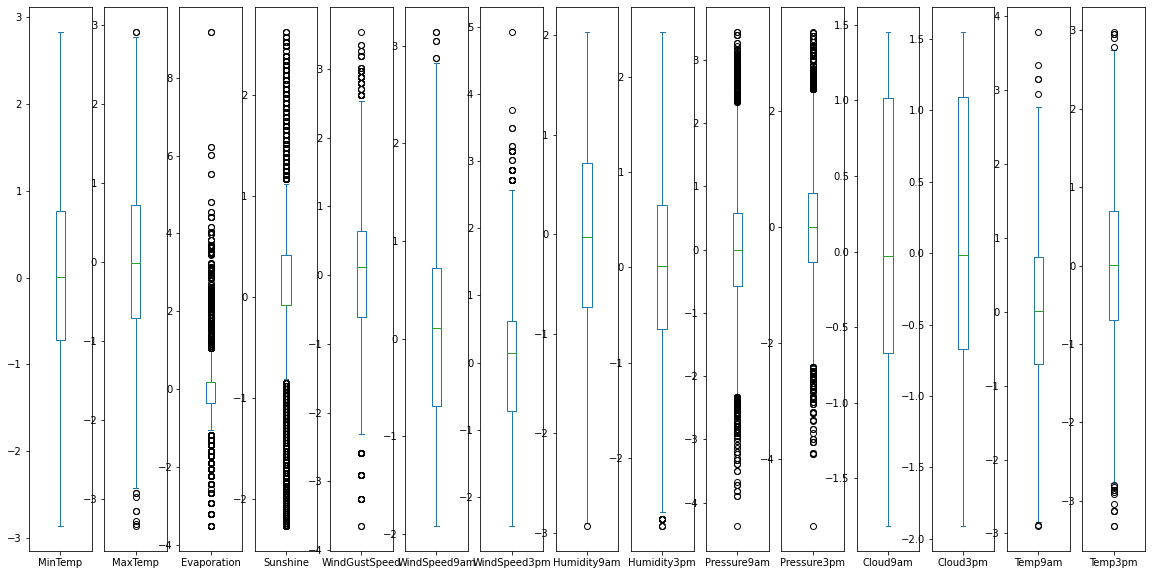

In [23]:
from scipy.stats import zscore
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [24]:
z = np.abs(zscore(dc2))
np.where(z>3)

(array([  12,   12,   52,  123,  190,  190,  193,  193,  238,  238,  296,
         381,  466,  555,  555,  563,  568,  568,  569,  574,  574,  602,
         608,  683,  683,  748, 1008, 1387, 1413, 1467, 1480, 1644, 1665,
        1898, 2028, 2043, 2219, 2230, 2346, 2373, 2389, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897,
        2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
        3141, 3157, 3164, 3167, 3172, 3178, 3206, 3212, 3213, 3221, 3227,
        3248, 3260, 3278, 3303, 3449, 3449, 3450, 3687, 3701, 3707, 3715,
        3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791, 3799,
        3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912, 3919,
        3934, 3950, 3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030,
        4058, 4064, 4065, 4073, 4079, 4100, 4112, 4130, 4155, 4301, 4301,
        4302, 4528, 4528, 4566, 4568, 

# Outlier removal

In [25]:
df1 = dc2[(z<3).all(axis=1)]
df1.shape

(8193, 15)

In [26]:
dc2.shape

(8425, 15)

In [27]:
#outliers are removed

# Data Loss

In [28]:
((8425-8193)/8425)*100

2.7537091988130564

# Creating Categorical DataFrame with target variable

In [29]:
cat=["day","month","year","RainTomorrow","Rainfall"]
dfc = pd.DataFrame()
for i in cat:
    dfc[i] = df[i]
dfc.shape

dfc1 = dfc.join(a).join(b).join(c).join(d).join(e)

dfc1.shape

(8425, 62)

# Removing outliers

In [30]:
dfc1.drop([  12,   12,   52,  123,  190,  190,  193,  193,  238,  238,  296,
         381,  466,  555,  555,  563,  568,  568,  569,  574,  574,  602,
         608,  683,  683,  748, 1008, 1387, 1413, 1467, 1480, 1644, 1665,
        1898, 2028, 2043, 2219, 2230, 2346, 2373, 2389, 2710, 2738, 2743,
        2744, 2768, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897,
        2905, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3051, 3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139,
        3141, 3157, 3164, 3167, 3172, 3178, 3206, 3212, 3213, 3221, 3227,
        3248, 3260, 3278, 3303, 3449, 3449, 3450, 3687, 3701, 3707, 3715,
        3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3785, 3791, 3799,
        3805, 3813, 3819, 3827, 3841, 3903, 3910, 3911, 3911, 3912, 3919,
        3934, 3950, 3951, 3953, 3991, 3993, 4009, 4016, 4019, 4024, 4030,
        4058, 4064, 4065, 4073, 4079, 4100, 4112, 4130, 4155, 4301, 4301,
        4302, 4528, 4528, 4566, 4568, 4619, 4638, 4672, 4678, 4678, 4763,
        4771, 4779, 4780, 4780, 4785, 4797, 4811, 4814, 4854, 4854, 4895,
        4895, 4960, 4960, 5086, 5091, 5108, 5122, 5122, 5123, 5138, 5143,
        5145, 5164, 5165, 5173, 5175, 5175, 5176, 5176, 5214, 5214, 5237,
        5243, 5301, 5339, 5339, 5377, 5379, 5430, 5449, 5483, 5489, 5489,
        5574, 5582, 5590, 5591, 5591, 5596, 5608, 5622, 5625, 5665, 5665,
        5706, 5706, 5771, 5771, 5897, 5902, 5919, 5933, 5933, 5934, 5949,
        5954, 5956, 5975, 5976, 5984, 5986, 5986, 5987, 5987, 6025, 6025,
        6048, 6054, 6112, 6617, 6626, 6660, 6758, 6786, 6786, 6793, 6794,
        6794, 6862, 6876, 6904, 6918, 6925, 6960, 6978, 6993, 7128, 7132,
        7142, 7186, 7187, 7187, 7188, 7462, 7463, 7468, 7494, 7633, 7633,
        7735, 7735, 7984, 8114, 8119],inplace=True,axis=0)

In [31]:
dfc1.shape

(8193, 62)

# Mulitcolinearity Checking

In [32]:
# variance inflation factor

In [33]:
dft = df1.join(dfc1)
dft.drop('Rainfall',axis=1,inplace=True)
dft.shape

(8193, 76)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(76)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value feature names
17  102.598492          year
14   34.396283       Temp3pm
1    28.113179       MaxTemp
9    22.400081   Pressure9am
10   21.938519   Pressure3pm
..         ...           ...
2     1.780463   Evaporation
46    1.737311         9_ESE
35    1.685966       dir_NNW
31    1.679028       dir_ESE
27    1.327982    date_Uluru

[76 rows x 2 columns]

In [36]:
# year has high vif index so dropping it

In [37]:
dft.drop("year",axis=1,inplace=True)

In [38]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(75)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value feature names
14  34.385151       Temp3pm
1   28.079953       MaxTemp
9   22.339395   Pressure9am
10  21.930852   Pressure3pm
13  21.882736       Temp9am
..        ...           ...
49   1.779795         9_NNW
34   1.655196       dir_NNW
30   1.622266       dir_ESE
45   1.602865         9_ESE
26   1.170581    date_Uluru

[75 rows x 2 columns]

In [39]:
# Temp3pm has high vif index so dropping it

In [40]:
dft.drop("Temp3pm",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(74)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value feature names
9   21.777767   Pressure9am
10  21.481524   Pressure3pm
13  20.577617       Temp9am
1   10.959269       MaxTemp
0   10.484754       MinTemp
..        ...           ...
48   1.779257         9_NNW
33   1.654230       dir_NNW
29   1.622107       dir_ESE
44   1.602758         9_ESE
25   1.169559    date_Uluru

[74 rows x 2 columns]

In [41]:
dft.drop("Pressure9am",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(73)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value   feature names
12  20.224087         Temp9am
0   10.441220         MinTemp
1   10.431903         MaxTemp
29   7.159483           dir_N
20   6.403852  date_Melbourne
..        ...             ...
32   1.653951         dir_NNW
9    1.636167     Pressure3pm
28   1.621942         dir_ESE
43   1.602654           9_ESE
24   1.169168      date_Uluru

[73 rows x 2 columns]

In [42]:
dft.drop("Temp9am",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(72)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

vif value   feature names
28   7.157319           dir_N
19   6.252568  date_Melbourne
1    6.214326         MaxTemp
43   6.003233             9_N
20   5.780878  date_Newcastle
..        ...             ...
31   1.653869         dir_NNW
9    1.629896     Pressure3pm
27   1.621443         dir_ESE
42   1.602385           9_ESE
23   1.154400      date_Uluru

[72 rows x 2 columns]

# Multicolinearity Removed

In [43]:
x_final= dft

x_final.shape

(8193, 72)

In [44]:
y=dfc1.iloc[:,4]

# Model Training

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# cross val score and test score

In [46]:
result = pd.DataFrame(columns=["Model Name","Train Score","Test Score","Cross Val Score"])
lin=[]
dec=[]
rid=[]
las=[]
kne=[]
rfr=[]
ada=[]
licol=[lin,dec,rid,las,kne,rfr,ada]

algo = [LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
oo= 0    
for v in algo:
    r = 0
    acc = 0
    for i in range(0,60):
        al = v
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=i)
        al.fit(train_x,train_y)
        score = al.score(train_x,train_y)
        if score>acc:
            acc = score
            r = i
            
    print(f'the best random state is {r} and best accuracy is { acc} for {v}')     
        
 
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=r)
    al.fit(train_x,train_y)
    trs = al.score(train_x,train_y)
    tss = al.score(test_x,test_y)
    cvs = cross_val_score(al,x_final,y,cv=KFold(5)).mean()
    print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} for {v}')    
    licol[oo].insert(0,v)
    licol[oo].insert(1,trs)
    licol[oo].insert(2,tss)
    licol[oo].insert(3,cvs)
    result.loc[oo] = licol[oo]
    oo+=1

final_result = result.sort_values(by=["Cross Val Score","Test Score"],ascending=False)   


the best random state is 53 and best accuracy is 0.30298004904380105 for LinearRegression()
the training score is 0.30298004904380105 the testing score is 0.1529080925038735 the cross val score is 0.23785054647602596 for LinearRegression()
the best random state is 0 and best accuracy is 1.0 for DecisionTreeRegressor()
the training score is 1.0 the testing score is 0.19585237581724524 the cross val score is -0.1101788880483194 for DecisionTreeRegressor()
the best random state is 53 and best accuracy is 0.3029784670468214 for Ridge()
the training score is 0.3029784670468214 the testing score is 0.15292957221426373 the cross val score is 0.23828063467271762 for Ridge()
the best random state is 53 and best accuracy is 0.20002873735473814 for Lasso()
the training score is 0.20002873735473814 the testing score is 0.08804952281672362 the cross val score is 0.18316755209041147 for Lasso()
the best random state is 33 and best accuracy is 0.49428694330305256 for KNeighborsRegressor()
the trainin

In [47]:
final_result

Model Name  Train Score  Test Score  \
5  (DecisionTreeRegressor(max_features=1.0, rando...     0.932949    0.278437   
2                                            Ridge()     0.302978    0.152930   
0                                 LinearRegression()     0.302980    0.152908   
3                                            Lasso()     0.200029    0.088050   
4                              KNeighborsRegressor()     0.494287    0.160576   
1                            DecisionTreeRegressor()     1.000000    0.195852   
6  (DecisionTreeRegressor(max_depth=3, random_sta...    -1.265244   -5.522600   

   Cross Val Score  
5         0.456199  
2         0.238281  
0         0.237851  
3         0.183168  
4         0.118820  
1        -0.110179  
6        -2.088865

In [48]:
final_result["Model Name"][5]

RandomForestRegressor()

In [49]:
# Random Foreset RegressorPerformed Best compared to all

# Hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
rf = RandomForestRegressor()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'n_estimators': [50,100,200]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=33)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 200]})

In [52]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

# Running Random Forest with Best Parameters

In [54]:
rf = RandomForestRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,n_estimators=100)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.15,random_state=33)
rf.fit(train_x,train_y)
trs = rf.score(train_x,train_y)
tss = rf.score(test_x,test_y)
pred = rf.predict(test_x)
cvs = cross_val_score(rf,x_final,y).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs}')
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("Mean Absolute Error", mean_absolute_error(test_y,pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_y,pred)))
print("R2 Score", r2_score(test_y,pred))

the training score is 1.0 the testing score is 0.39421618205691433 the cross val score is 0.49317548661192073
Mean Squared Error 64.77079714906807
Mean Absolute Error 1.53398978136294
Root Mean Squared Error 8.048030637930504
R2 Score 0.39421618205691433


In [55]:
# After tuning training score gets 100% and testing score 39 % and cross val socre 49%

# Saving the model

In [58]:
import joblib
joblib.dump(rf,"Rainfall amount.pk")

['Rainfall amount.pk']